## Importing the Required Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pathlib import Path
from keras.preprocessing import image

## Reading images from database and combining them together with labels

In [15]:
p=Path("Images/")
dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data =[]
labels=[]

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]

    for img_path in folder_dir.glob("*.jpg"):
        
        #reading images in a standard size of 32 X 32  so that we have lesser no. of features
        img = image.load_img(img_path,target_size=(32,32))
        
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [16]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
print(len(image_data))
print(len(labels))

808
808


## Converting the data into a numpy array

In [18]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


## Randomly Shuffling the data for better practice

In [19]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

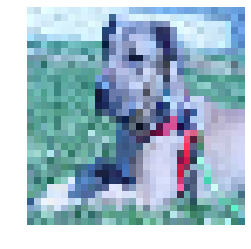

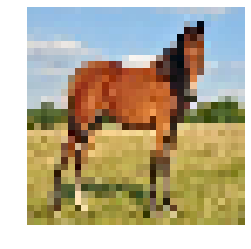

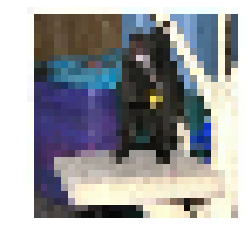

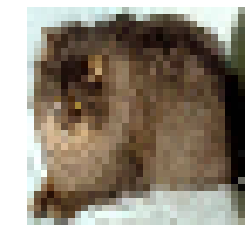

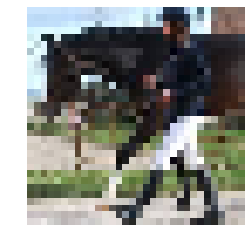

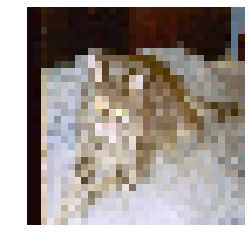

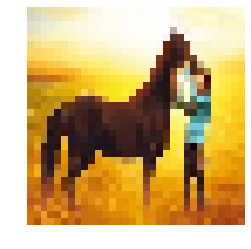

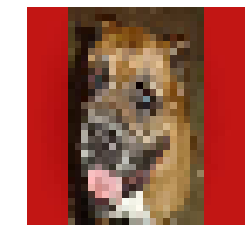

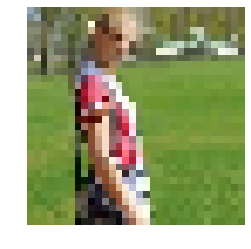

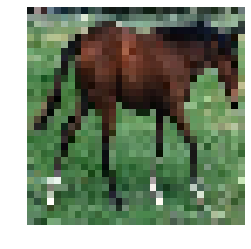

In [20]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    return

for i in range(10):
    drawImg(image_data[i])

## Writing the SVM code for Classification

In [21]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

## Converting Data for One to One Classification

In [22]:
M = image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [26]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [27]:
def classWiseData(x,y):
    data={}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
    
    return data

In [28]:
data = classWiseData(image_data,labels)

In [31]:
#every class i.e dog,cat,human and horse have same no. of values
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 3072)
(202, 3072)
(202, 3072)
(202, 3072)


In [34]:
# laveling data of single class as -1 and combining data of other classes as 1 and grouping them together

def getdatapairfromsvm(d1,d2):
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2

    data_labels[:l1]=-1
    data_labels[l1:]=+1
    
    return data_pair,data_labels

## Training Nc2 classifiers for SVM'S part

In [58]:
mySVM = SVM()
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i]={}
        for j in range(i+1,CLASSES):
            xpair,ypair = getdatapairfromsvm(data[i],data[j])
            wts,b,loss=mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

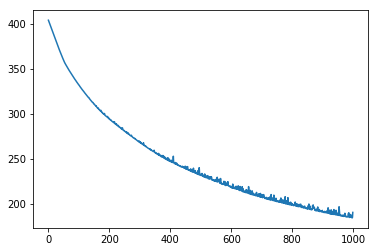

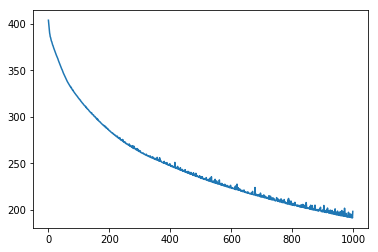

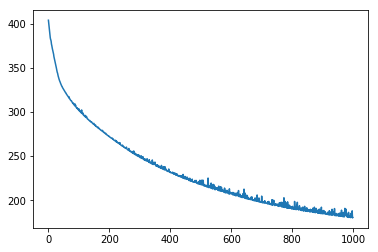

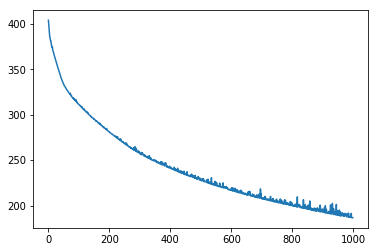

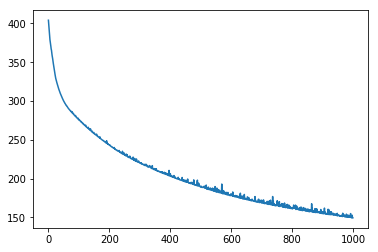

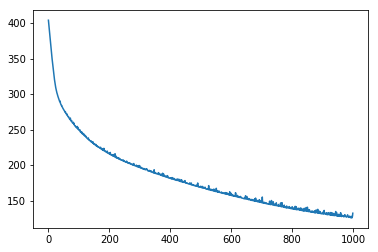

In [59]:
svm_classifiers=trainSVMs(image_data,labels)

In [53]:
#Parameters for Cats and Dogs

cats_dogs = svm_classifiers[0][1] # this is the hyper plane for cats and dogs
print(cats_dogs[0].shape) # this is weight term
print(cats_dogs[1]) # this is bias term

#Parameters for Cats and Humans

cats_humans = svm_classifiers[0][3] # this is the hyper plane for cats and dogs
print(cats_humans[0].shape) # this is weight term
print(cats_humans[1]) # this is bias term


(1, 3072)
0.015230000000000007
(1, 3072)
0.007799999999999989


## Prediction

In [45]:
def binaryPredict(x,w,b):
    z=np.dot(x,w.T) +b
    if z>=0:
        return 1
    else:
        return -1

In [47]:
def predict(x):
    
    # this count is taken to take the majority vote
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            
            #Take a majority prediction
            
            z=binaryPredict(x,w,b)
            
            if(z==1):
                count[j] +=1
                
            else:
                 count[i] +=1
    final_prediction = np.argmax(count)
    return final_prediction

In [54]:
print(predict(image_data[0]))
print(labels[0])

0
1


## Testing Accuracy

In [60]:
def accuracy(x,y):
    
    count=0
    
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction == y[i]):
            count+=1
    return count/x.shape[0]

In [61]:
accuracy(image_data,labels)

0.6039603960396039

## Implementing the Algo from Sklearn

In [62]:
from sklearn import svm

In [ ]:
svm_classifier = svm.SVC(kernel='linear',C)